# Task: Riconoscimento automatico di una review positiva o negativa;

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os


## Get reviews dataset

In [42]:
df_review = pd.read_csv('./dataset/review_dropped.csv')

In [43]:
# review_id // string, 22 character unique review id
# user_id // string, 22 character unique user id, maps to the user in user.json
# business_id // string, 22 character business id, maps to business in business.json
# stars // integer, star rating
# date // string, date formatted YYYY-MM-DD
# text // string, the review itself
# useful // integer, number of useful votes received by review
# funny // integer, number of funny votes received by review
# cool // integer, number of cool votes received by review

In [44]:
# Drop some rows in order to increment performances

df_review = df_review.iloc[460000:, :]
df_review = df_review.reset_index()

df_review.head(5)

,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,460000,460000,6950282,fMi-fMAF2gQBVoDNn2htvg,o0qmD_yMXUJAENJIxK-R2w,OAXfyHD2TUE0CRnvLPhjrQ,5.0,0.0,0.0,0.0,La comida nunca falla y siempre salgo de este ...,2020-10-10 19:06:23
1,460001,460001,6950283,88IcFpg4-l8XoqHQKU_OxA,WRr75y_xIFelWdYfQxyJ5w,VHygCy5cbO08-a5lU-tnnw,1.0,0.0,0.0,0.0,"Doesnt just give Colombian food a bad rap, thi...",2021-05-07 22:13:19
2,460002,460002,6950284,aF01DTfuwHwfb-Yy5NedOg,TjurBaHWUOjqrdVwsrrspQ,YjLMWlHoBJHtYMLdFXfvVg,5.0,0.0,0.0,0.0,"Always great tasting food, never disappoints a...",2021-05-08 00:05:22
3,460003,460003,6950285,FH13JX5jrBsv1zv_8SFU6A,UfEASETOi5Yy5b0NrnaHdQ,1UHjA5mo1UI2TmImfdYXKw,1.0,0.0,0.0,0.0,My kids were super excited to be able to go se...,2021-05-08 17:14:27
4,460004,460004,6950286,2aJBpUc7IGEmXz47nrUqGg,FnNmbt953nh7H3Hv6zo42w,_WwzD40u9w2aAgKPUe2zCQ,4.0,1.0,0.0,1.0,The Indy Wing Club (IWC) was out making their ...,2021-05-02 11:46:13


### Add boolean positive_review to dataset in order to recognize positive review (>= 4 stars)


In [45]:
df_review['review_rating'] = np.where(df_review['stars'] >= 4, 1, 0)

df_review.head(5)


,level_0,Unnamed: 0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_rating
0,460000,460000,6950282,fMi-fMAF2gQBVoDNn2htvg,o0qmD_yMXUJAENJIxK-R2w,OAXfyHD2TUE0CRnvLPhjrQ,5.0,0.0,0.0,0.0,La comida nunca falla y siempre salgo de este ...,2020-10-10 19:06:23,1
1,460001,460001,6950283,88IcFpg4-l8XoqHQKU_OxA,WRr75y_xIFelWdYfQxyJ5w,VHygCy5cbO08-a5lU-tnnw,1.0,0.0,0.0,0.0,"Doesnt just give Colombian food a bad rap, thi...",2021-05-07 22:13:19,0
2,460002,460002,6950284,aF01DTfuwHwfb-Yy5NedOg,TjurBaHWUOjqrdVwsrrspQ,YjLMWlHoBJHtYMLdFXfvVg,5.0,0.0,0.0,0.0,"Always great tasting food, never disappoints a...",2021-05-08 00:05:22,1
3,460003,460003,6950285,FH13JX5jrBsv1zv_8SFU6A,UfEASETOi5Yy5b0NrnaHdQ,1UHjA5mo1UI2TmImfdYXKw,1.0,0.0,0.0,0.0,My kids were super excited to be able to go se...,2021-05-08 17:14:27,0
4,460004,460004,6950286,2aJBpUc7IGEmXz47nrUqGg,FnNmbt953nh7H3Hv6zo42w,_WwzD40u9w2aAgKPUe2zCQ,4.0,1.0,0.0,1.0,The Indy Wing Club (IWC) was out making their ...,2021-05-02 11:46:13,1


### Plot reviews

Positive reviews: 25622
Negative reviews: 14378


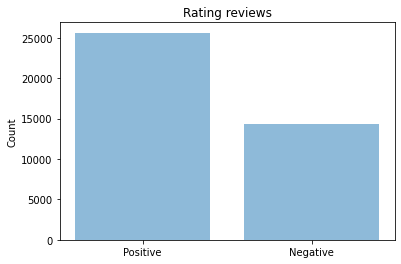

In [46]:
positive_count = (df_review['review_rating'] == 1).sum()
negative_count = (df_review['review_rating'] == 0).sum()

print("Positive reviews:" , positive_count)

print("Negative reviews:" , negative_count)

objects = ('Positive', 'Negative')
performance = [positive_count, negative_count]
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Rating reviews')

plt.show()



# Text preprocessing


## Normalization

### Expand English contractions

In [47]:
import contractions

In [48]:
def expand_contractions(sentence):
  expanded_words = [] 

  for word in sentence.split():
    expanded_words.append(contractions.fix(word)) 

  return ' '.join(expanded_words)

df_text = df_review[['text']]

for sentence in df_text['text']:
  df_text_expanded = df_text[['text']].replace(sentence, expand_contractions(sentence))

df_text_expanded.head(5)


,text
0,La comida nunca falla y siempre salgo de este ...
1,"Doesnt just give Colombian food a bad rap, thi..."
2,"Always great tasting food, never disappoints a..."
3,My kids were super excited to be able to go se...
4,The Indy Wing Club (IWC) was out making their ...
